THE SPARKS FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS (GRIP JULY'21)
# Task 3

Author: Nikita Kothale

objective : Exploratory Data Analysis - Retail

# Importing Libraries

In [1]:
# Importing the libraries

# Linear Algebra
import pandas as pd

# Data processing
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [5]:
# Loading Data
data = pd.read_csv('C:\\Users\\admin\\Desktop\\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploring the Data

In [8]:
# Structure of Dataset
data.shape
# There are 9994 observations and 13 columns for this dataset.

(9994, 13)

In [9]:
# Viewing Descriptive Statistic
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Checking for Null Values
data.isna().sum().to_frame('Null Values')

,Null Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


THERE ARE NO MISSING VALUES 

In [11]:
# Checking for Duplicates
data.duplicated().sum()

17

In [12]:
# Removing Duplicates
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
# Unique values in Country Column
data.Country.unique()

array(['United States'], dtype=object)

In [14]:
# Count of unique values
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
# Dropping Unnecessary columns from the Dataset
data = data.drop(columns=['Postal Code', 'Country'], axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
# Statistics of Data
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


# Correlation Analysis

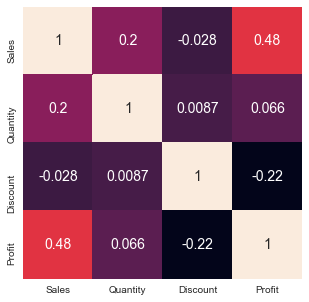

In [17]:
# PLotting Correlation between Variables
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

In this case, the only predictors that are considered to be dropped will be if their intercorrelations are above 0.95 and thus almost perfect descriptions of each other. It would be redundant to include both of them. Therefore, no attributes were removed as to not lose relevant information and degrade the overall EDA process.
Sales and Profit have a moderate positive linear correlation with 48%. When Sales increase by $1, Profit will increase by $0.48. This indicates that this Superstore is a popular company with constant demand of the products sold, and the management may have a good ability in managing costs to ensure high profit margins.
Discount and Profit have a weak negative linear correlation. When Discount increase by 1%, Profit will decrease by $0.22. This is because discount deductions will reduce overall sales revenues.
Quantity and Profit have little to no linear correlation. This indicates that the Superstore may sell a considerable number of products at low profit margins, with promotional strategies such as higher discounts on larger quantities of products in a single transaction, and Buy One Get One Free (BOGOF) promotions. As a result, average profit is lower. Another likely explanation is that Profit will increase as Quantity increases, but not on a linear scale.

In [18]:
#The final dataset information is summarised below.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


# EDA- DATA VISUALIZATION

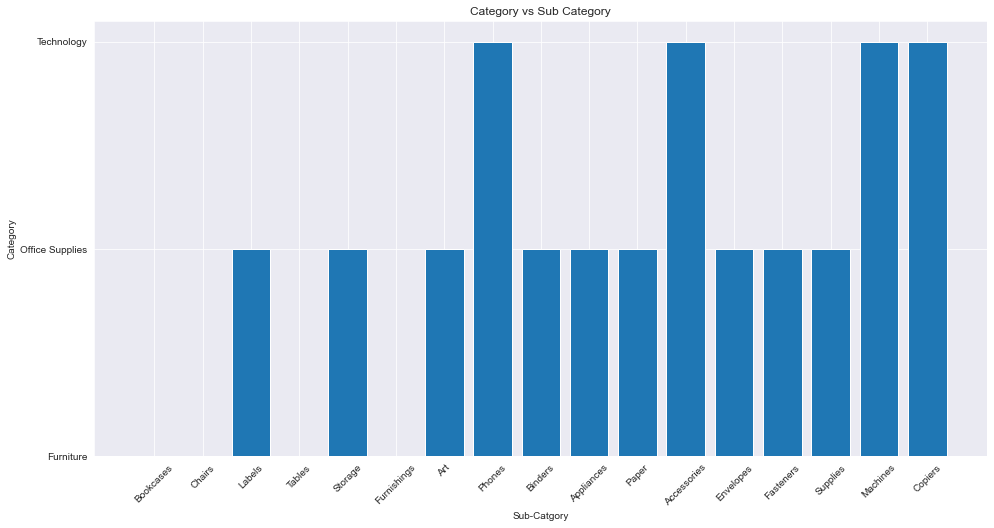

In [20]:
# Sub-category vs Category 

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=data)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

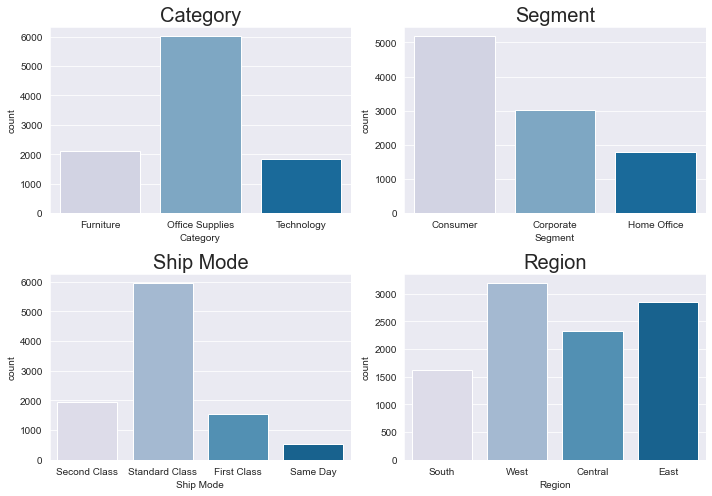

In [21]:
# Count of each Category, Segment, Ship Mode, and Region

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
sns.countplot(data['Category'], ax = axs[0][0], palette = 'PuBu')
sns.countplot(data['Segment'], ax = axs[0][1], palette = 'PuBu')
sns.countplot(data['Ship Mode'], ax = axs[1][0], palette = 'PuBu')
sns.countplot(data['Region'], ax = axs[1][1], palette = 'PuBu')
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

This clearly shows that data available for "Office Supplies" has almost 3 times the proportion than that for the other two categories, which will be taken note of for further data visualisations and analysis later on.
Data available for "Standard Class" has almost 3 times the proportion than that for "Second Class" and "First Class" categories, and 12 times that for "Same Day".
Customer Segment is equal to the sum of Corporate Segment anf Home Office.
Region Count is very flexible.

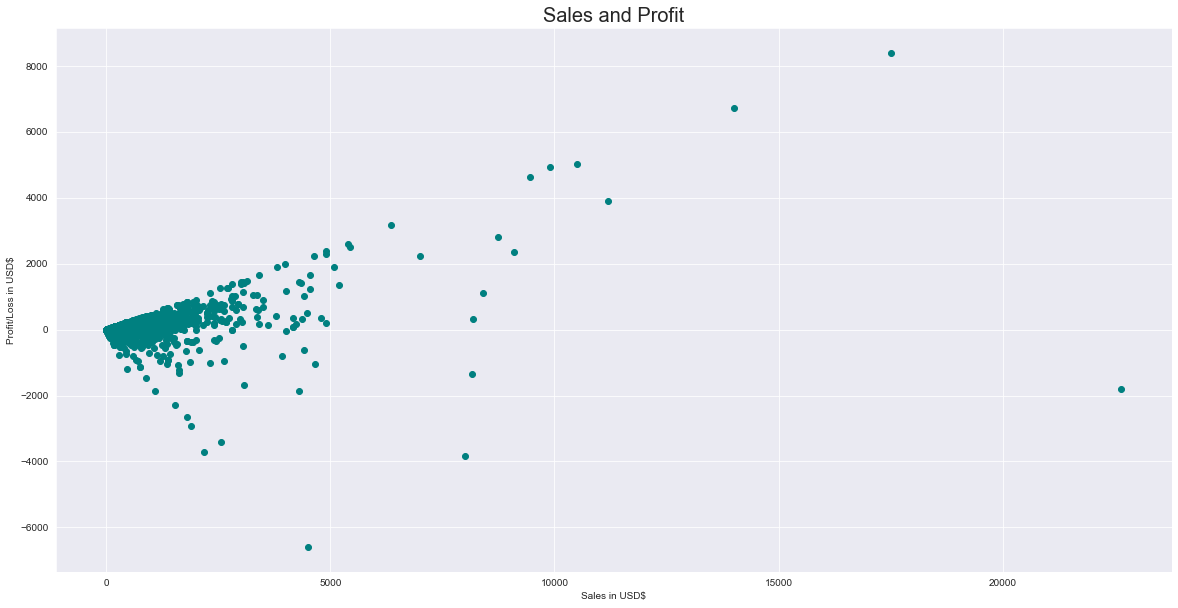

In [22]:
# Scatterplot of Sales and Profit

fig, ax = plt.subplots(figsize = (20, 10))
ax.scatter(data["Sales"] , data["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

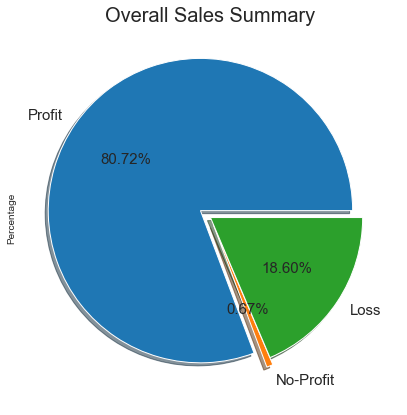

In [23]:
# Plotting Overall Sales Summary
summary = pd.DataFrame({'Profit':data.Quantity[data.Profit > 0].sum(), 
                        'No-Profit':data.Quantity[data.Profit == 0].sum(), 
                        'Loss':data.Quantity[(data.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0))
plt.show()

# Overall Profit Analysis

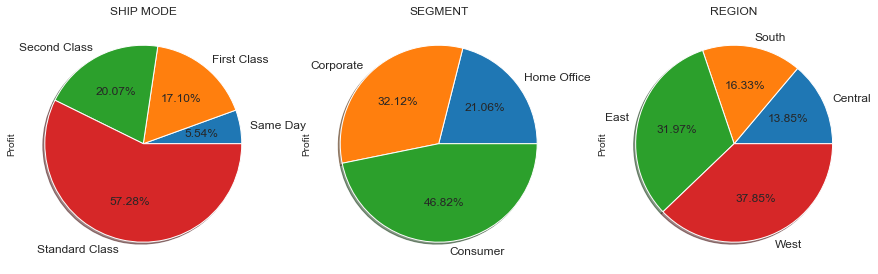

In [24]:
# Plotting Shipmode, Segment, and Region-wise profit

prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

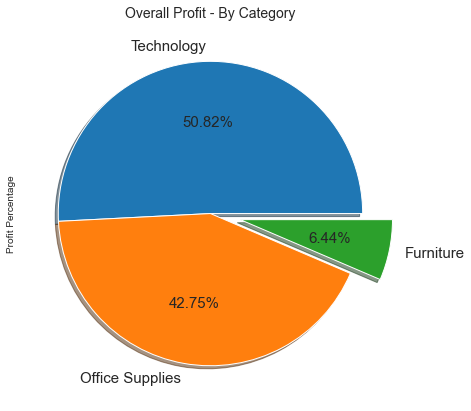

In [25]:
# Profit by Category

cat = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

Total items Sold: 37820


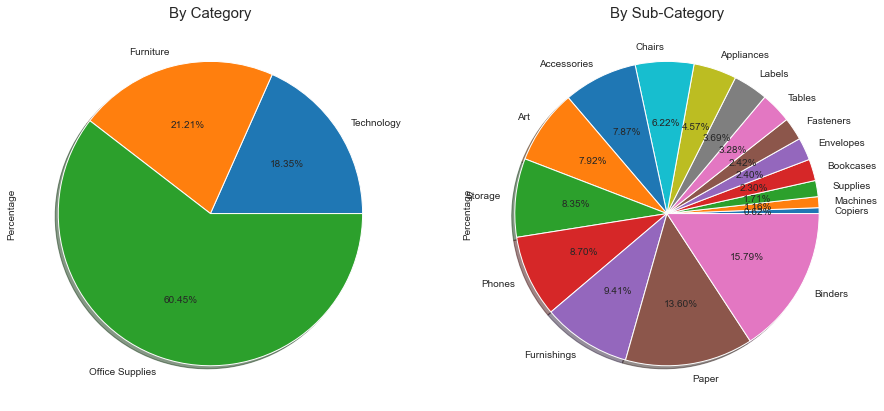

In [26]:
# Items sold by Category and Sub-category

cat = data.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = data.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {data.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)
cat.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

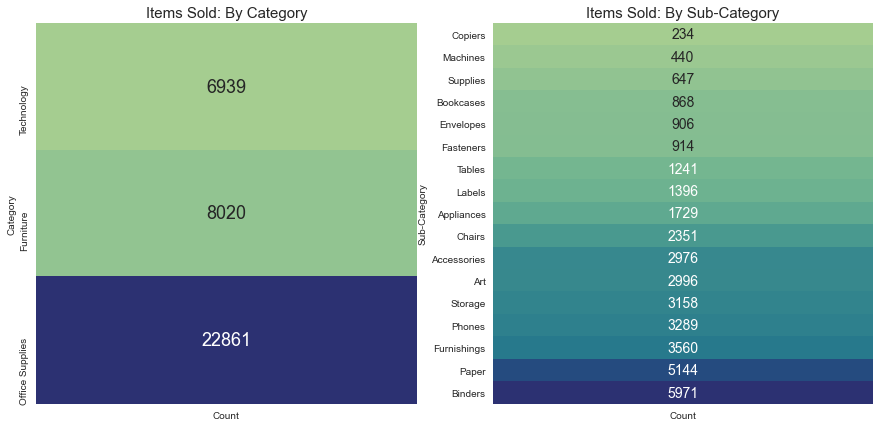

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, cmap='crest', fmt='2', annot_kws={'size':18})
sns.heatmap(sub, ax=ax[1], annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
plt.show()
plt.show()

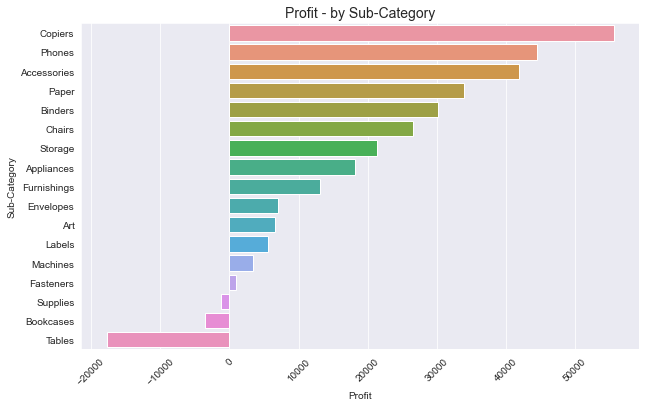

In [28]:
# Sales Summary by Sub-Category

sub = np.round(data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=45)
plt.show()


# State-wise Analysis


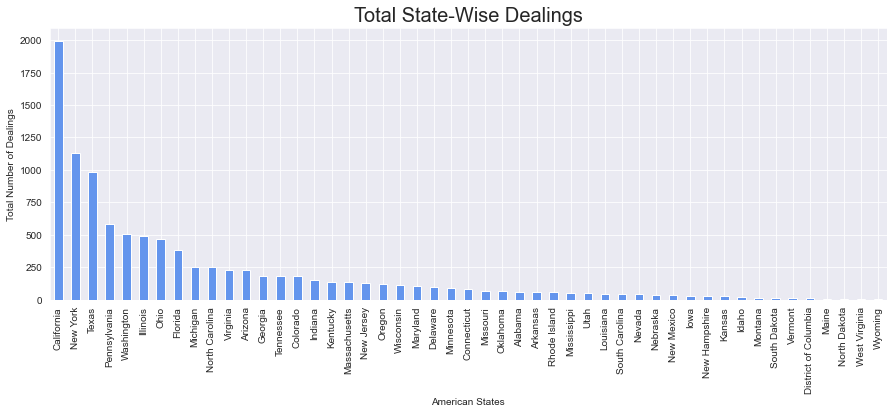

In [29]:
# Total dealings for each State

df_state_dealings = data.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                    color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

Superstore has the notable highest dealings in the state of California, with around 2K of total dealings.
With a big trailing gap, New York has the second highest dealings, with around 1,125 of total dealings.
Taxs is third with around 1K of total dealings.
The states of District of Columbia, Maine, North Dakota, West Virginia, and Wyoming have comparatively negligible dealings. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than 100 total dealings.

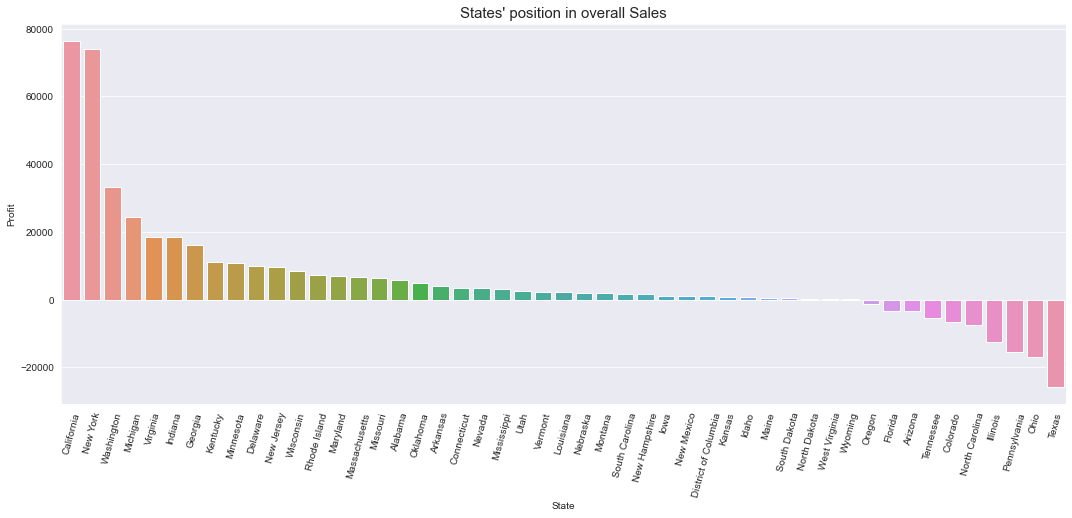

In [32]:
# Total Profit for each State

state_P = pd.DataFrame(data.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title("States' position in overall Sales", fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

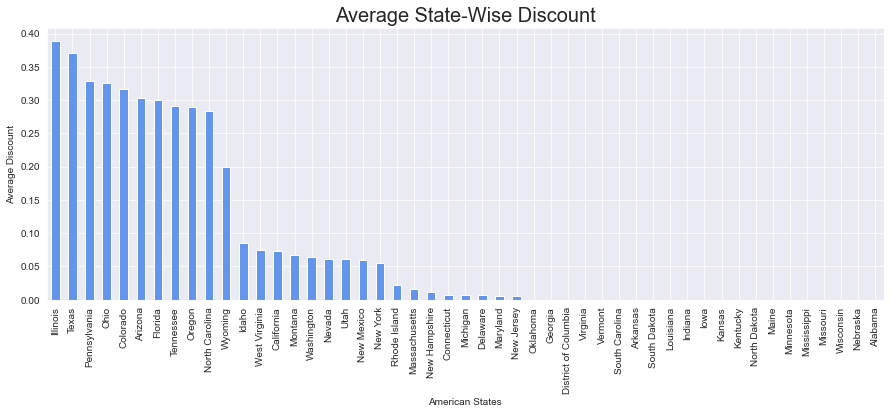

In [31]:
# Average Discount for each State

df_state_profit = data.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

# Region-wise Analysis

REGION-WISE SALES SUMMARY


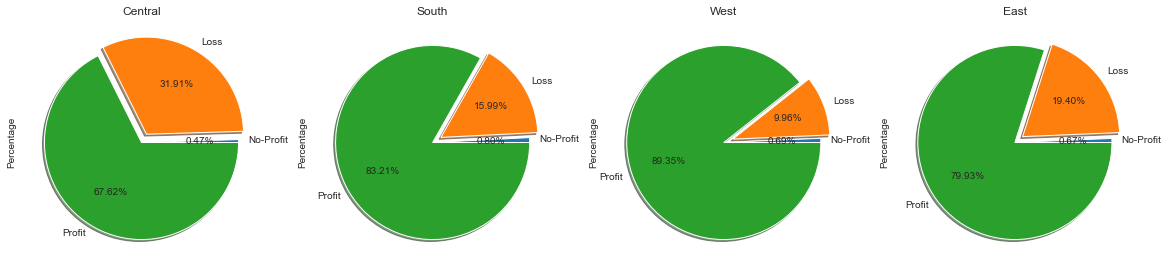

In [33]:
summ_cent = pd.DataFrame({'Profit':data[(data.Region == 'Central') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'Central') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'Central') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_sou = pd.DataFrame({'Profit':data[(data.Region == 'South') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'South') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'South') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_west = pd.DataFrame({'Profit':data[(data.Region == 'West') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'West') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'West') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_east = pd.DataFrame({'Profit':data[(data.Region == 'East') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'East') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'East') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,4, figsize=(20,10))
print('REGION-WISE SALES SUMMARY')
ax[0].set_title('Central')
ax[1].set_title('South')
ax[2].set_title('West')
ax[3].set_title('East')
summ_cent.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[0], explode=(0,0.1,0), shadow=True)
summ_sou.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[1], explode=(0,0.1,0), shadow=True)
summ_west.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[2], explode=(0,0.1,0), shadow=True)
summ_east.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[3], explode=(0,0.1,0), shadow=True)
plt.show()

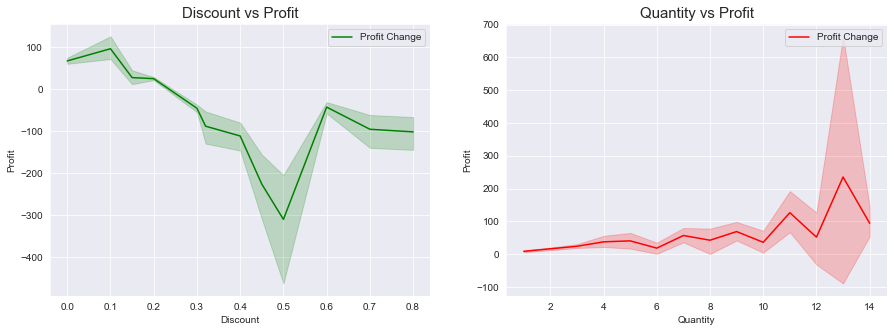

In [34]:
# Analysis on Discount, Quantity & Profit

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)
sns.lineplot(data.Discount, data.Profit, color='green', label='Profit Change', ax=ax[0])
sns.lineplot(data.Quantity, data.Profit, color='red', label='Profit Change', ax=ax[1])
plt.show()

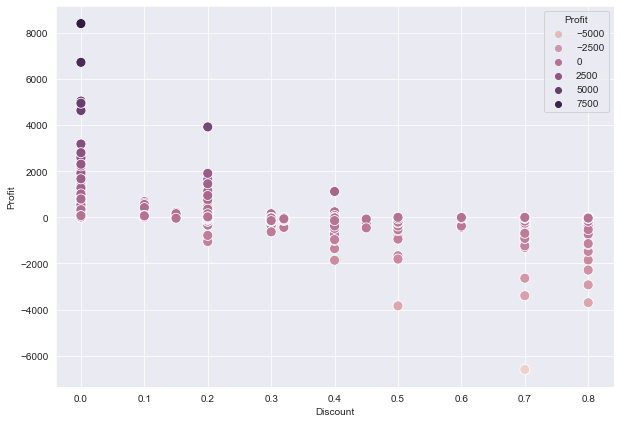

In [35]:
# Plotting Profit change with Discount 

plt.figure(figsize=(10,7))
sns.scatterplot(data.Discount, data.Profit, hue=data.Profit, s=100)
plt.show()

Findings:-

The profit is in a good range when the discount is minimal, and there is no discount.

When discount increases, Sales Loss is increasing and vice versa.

Central region facing more loss in sales compared with others.

Texas & Illinois are the States where overall sales are in loss and particularly for furniture.

Supply of Furniture results in high loss - especially Tables & Bookcases.

Texas & Illinois have a loss in some of the Office-Supplies - Binders, Appliances & Storage(& Supplies in Texas).

States except Pennsylvania, Texas & Illinois has profit in sales of Chairs & Furnishings.

Conclusion:-

The product must sell with no discount to become the best profitable. One thing has to be kept in mind is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business.

Offering discounts more when the quantity is high which will increase the sales.